## pytorch 学习

2019年11月02日，开始学习pytorch，参考资源莫凡视频课（[哔哩哔哩](https://www.bilibili.com/video/av15997678)，[Github站点](https://morvanzhou.github.io/tutorials/machine-learning/torch/)）

### 01.该代码用于熟悉numpy和torch

In [1]:
import torch
import numpy as np

In [2]:
# 创建数据
np_data = np.arange(6).reshape((2,3))   # numpy 数据
torch_data = torch.from_numpy(np_data)  # torch数据（numpy转torch）

print(
    '\nnumpy', np_data,
    '\ntroch', torch_data
)


numpy [[0 1 2]
 [3 4 5]] 
troch tensor([[ 0,  1,  2],
        [ 3,  4,  5]], dtype=torch.int32)


In [3]:
tensor2array = torch_data.numpy()      # # torch数据转tnumpy
print('\ntensor2array', tensor2array)


tensor2array [[0 1 2]
 [3 4 5]]


运算符号，torch很多都可以用numpy的思维来看.

很多学习内容都可以直接去[pytorch官网](https://pytorch-cn.readthedocs.io/zh/latest/)

In [10]:
# abs
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)   # 32 bit
print(
    'abs:',
    '\nnumpy-abs',np.abs(data),
    '\ntorch-abs',torch.abs(tensor)
)

print(
    '\nsin:',
    '\nnumpy',np.sin(data),
    '\ntorch',torch.sin(tensor)
)

print(
    '\nmean:',
    '\nnumpy',np.mean(data),
    '\ntorch',torch.mean(tensor)
)

abs: 
numpy-abs [1 2 1 2] 
torch-abs tensor([ 1.,  2.,  1.,  2.])

sin: 
numpy [-0.84147098 -0.90929743  0.84147098  0.90929743] 
torch tensor([-0.8415, -0.9093,  0.8415,  0.9093])

mean: 
numpy 0.0 
torch tensor(0.)


矩阵形式的运算，需要注意的是：torch的运算接收的都是tensor的形式，所以很多来自numpy、python等的数据需要先转换为tensor的形式（e.g.torch.FloatTensor()）。

In [34]:
data = [[1,2], [3,4]]
tensor = torch.FloatTensor(data)   # 32-bit floating point

print(
    '\n numpy:', np.matmul(data, data),
    '\n torch:', torch.mm(tensor, tensor)
)


np_data = np.array(data)
print(
    '\n dot:',
    '\n python',np_data.dot(np_data),
    '\n torch',torch.dot(tensor.reshape([-1]), tensor.reshape([-1])) # torch.dot() 输入为两个1-Dtensor
)


 numpy: [[ 7 10]
 [15 22]] 
 torch: tensor([[  7.,  10.],
        [ 15.,  22.]])

 dot: 
 python [[ 7 10]
 [15 22]] 
 torch tensor(30.)


### 02.Variable 变量

In [50]:
import torch as T
from torch.autograd import Variable

In [59]:
tensor = T.FloatTensor([[1,2],[3,4]])
variable = Variable(tensor, requires_grad=True)

print(
    '\ntensor',tensor,
    '\nvariable',variable
)


tensor tensor([[ 1.,  2.],
        [ 3.,  4.]]) 
variable tensor([[ 1.,  2.],
        [ 3.,  4.]])


暂时看不出区别，但是，添加一些计算再来看看...

In [60]:
t_out = torch.mean(tensor * tensor)   # x^2
v_out = torch.mean(variable * variable)

print(
    '\nt_out', t_out,
    '\nv_out', v_out
)


t_out tensor(7.5000) 
v_out tensor(7.5000)


任然看不出区别，那么进行反向传递...

In [61]:
v_out.backward()
# v_out = 1/4 * sum(var*var)
# => d(v_out)/d(var) = 1/4 * 2 * varable = varable/2
# print(
#     'print the value \n', variable.grad
# )

此时，再来看看varable里的数据有没有发生改变...

In [63]:
print(
    '\n varible',variable,   # Variable containing
    '\n varible.data', variable.data,  # only tensor
    '\n varible.data.numpy()', variable.data.numpy() # numpy
)


 varible tensor([[ 1.,  2.],
        [ 3.,  4.]]) 
 varible.data tensor([[ 1.,  2.],
        [ 3.,  4.]]) 
 varible.data.numpy() [[1. 2.]
 [3. 4.]]


### 03.激励函数(Activation function)

激励函数主要是用于解决生活中线性变换不能解决的问题，即解决非线性问题。

例如，传统的 y=Wx 函数，通过添加非线性变换 ==> y=AF(Wx)， （可以理解为一种数据强行扭转）

常见的非线性变换函数 AF 有 relu，sigmoid，tanh 

如果要自己创建新的 AF，那么必须注意，这个函数是可微分的，因为误差反向传递的时候，只有可以微分的函数才能把误差传递回去。

使用技巧：

当使用很少的层，2-3层，随意选用可能就比较好；多层中最好不要随意选择。

常用选择，CNN中推荐使用relu， RNN中常用relu和tanh。

- 常见激励函数

 - relu

 - sigmoid

 - tanh

 - softplus

In [5]:
import torch as T
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

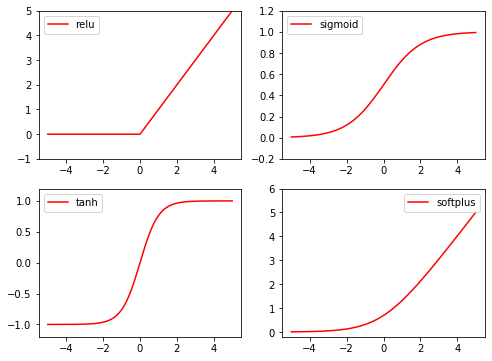

In [7]:
# fake data
x = T.linspace(-5, 5, 200)
x = Variable(x)
x_np = x.data.numpy()

# create groph
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

# plt
plt.figure(1, figsize=(8,6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

### 04.关系拟合（回归）

神经网络可以分成两种类型：
 - 回归

e.g.房价问题：有很多房子的信息（高、长、宽等），输出是一个固定的值。
 
 - 分类
 
e.g.猫狗图片分类：有很多图片，包含很多猫和狗，现在给出一张图片，让模型分析这张图片是猫还是狗。

In [8]:
import torch as T
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

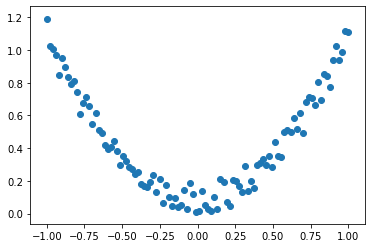

In [11]:
# create fake data
x = T.unsqueeze(T.linspace(-1, 1, 100), dim=1) # x data (tensor), shape = (100, 1)
y = x.pow(2) + 0.2 * T.rand(x.size())          # noise y data (tensor), shape = (100)

x,y = Variable(x),Variable(y)

# 查看生成的数据
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [18]:
class Net(T.nn.Module):
    def __init__(self, n_feature, n_hidden, n_ouput):
        super(Net, self).__init__()
        # 先定义层 ==> 再搭建层
        self.hidden = T.nn.Linear(n_feature, n_hidden)
        self.pridict = T.nn.Linear(n_hidden, n_ouput)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.pridict(x)  # 做预测后，不做截断（激活函数）
        return x

    
net = Net(1, 10, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (pridict): Linear(in_features=10, out_features=1, bias=True)
)


搭建完网络，接下来的工作就是优化网络，需要用优化器...

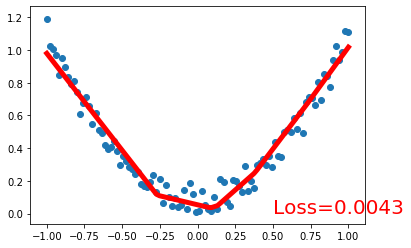

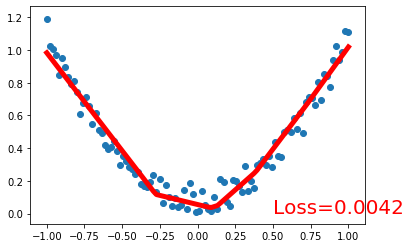

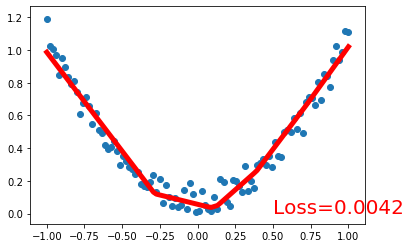

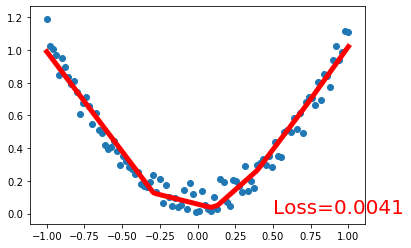

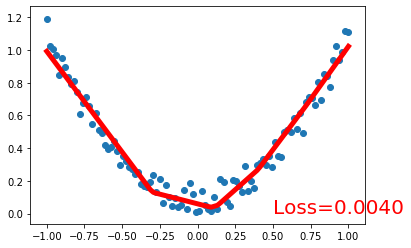

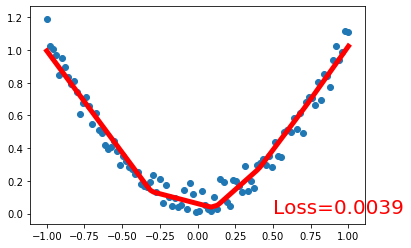

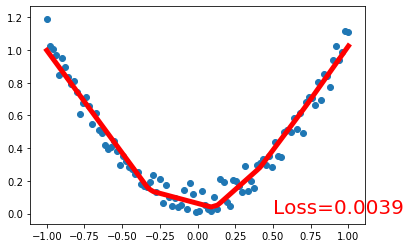

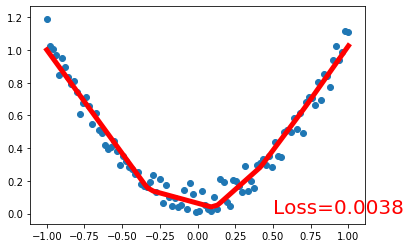

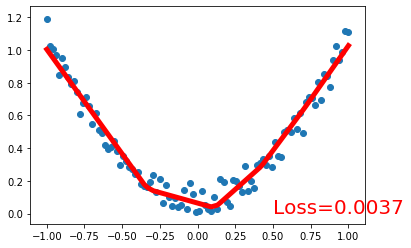

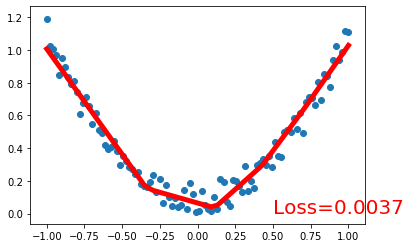

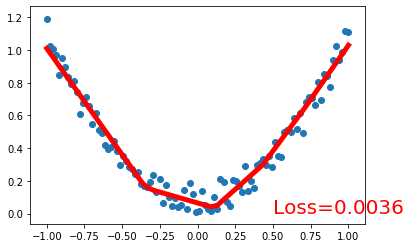

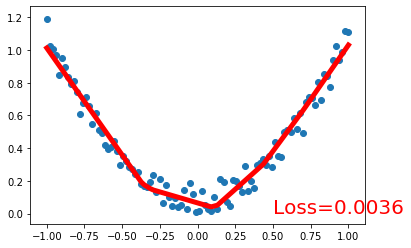

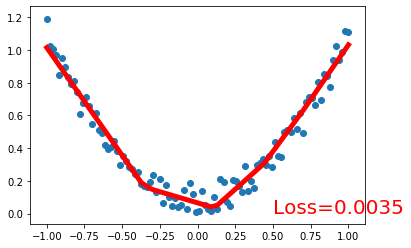

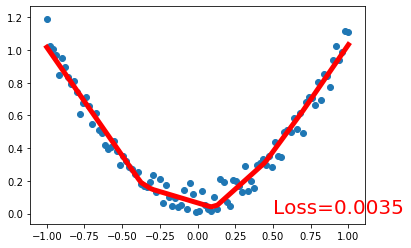

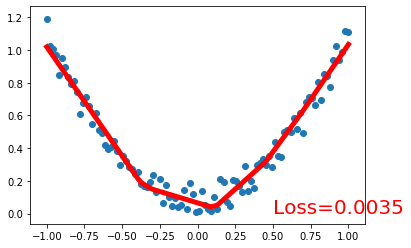

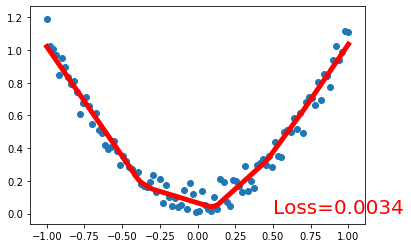

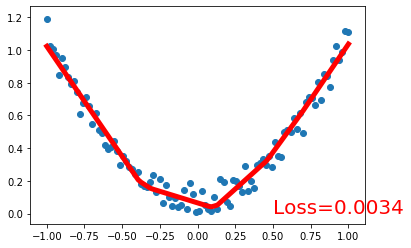

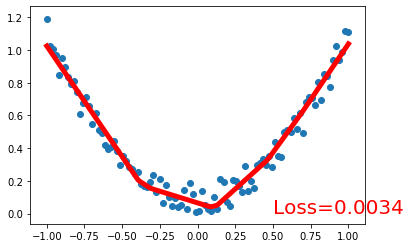

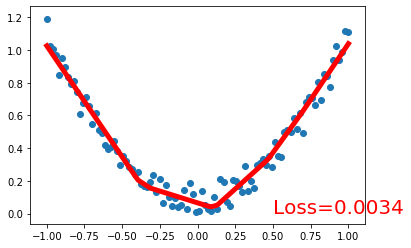

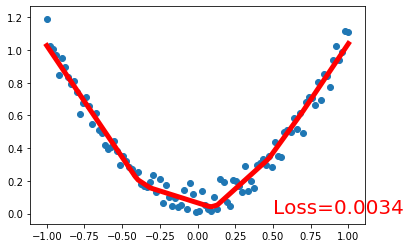

In [22]:
optimizer = T.optim.SGD(net.parameters(), lr=0.5)
loss_func = T.nn.MSELoss()

for t in range(100):
    prediction = net(x)
    
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()   # 取梯度全部降为0 （因为每次训练完后，梯度会被保留在内存中）
    loss.backward()         # 计算梯度 反向传递过程
    optimizer.step()        # 优化，用 lr 来进行优化
    
    # 可视化表示内容
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f'%loss.data.numpy(), fontdict={'size':20, 'color':'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()

### 05.分类

In [1]:
import torch as T
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

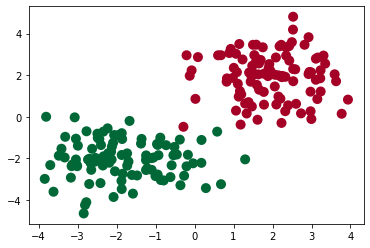

In [29]:
# create fake data
n_data = T.ones(100, 2)
x0 = T.normal(2*n_data, 1)   # class0 x data (tensor) ,shape=(100, 2)
y0 = T.zeros(100)            # class0 y data (tensor) ,shape=(100, )
x1 = T.normal(-2*n_data, 1)  # class1 x data (tensor) ,shape=(100, 2)
y1 = T.ones(100)             # class0 y data (tensor) ,shape=(100, )
x = T.cat((x0,x1), 0).type(T.FloatTensor)  # FloatTensor = 32-bit floating
y = T.cat((y0,y1),).type(T.LongTensor)    # FongTensor = 64-bit integer

x,y = Variable(x),Variable(y)

# 查看生成的数据
plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()

In [30]:
class Net(T.nn.Module):
    def __init__(self, n_feature, n_hidden, n_ouput):
        super(Net, self).__init__()
        # 先定义层 ==> 再搭建层
        self.hidden = T.nn.Linear(n_feature, n_hidden)
        self.pridict = T.nn.Linear(n_hidden, n_ouput)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.pridict(x)  # 做预测后，不做截断（激活函数）
        return x

    
net = Net(2, 10, 2)
# [1,0] ==> class 0,[0,1] ==> class 1 
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (pridict): Linear(in_features=10, out_features=2, bias=True)
)


d:\ide\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


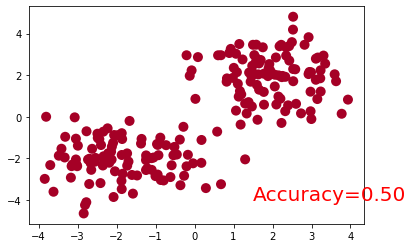

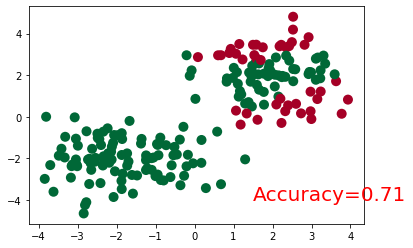

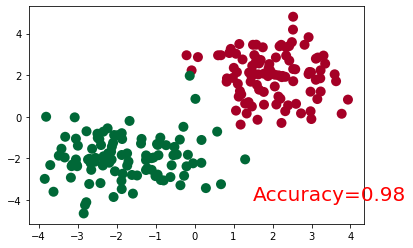

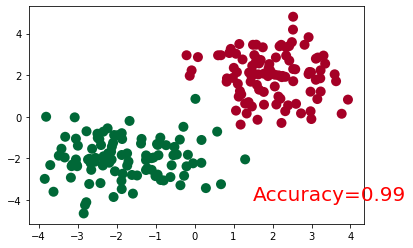

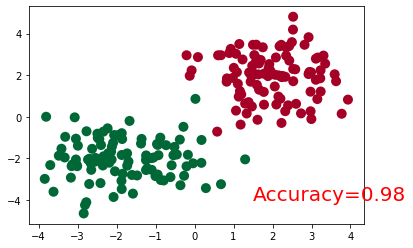

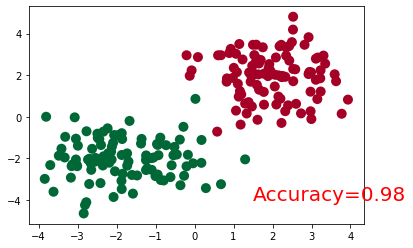

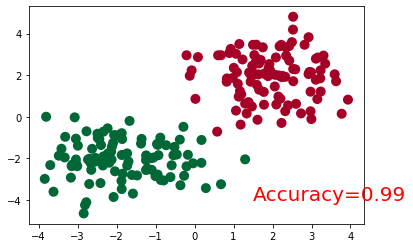

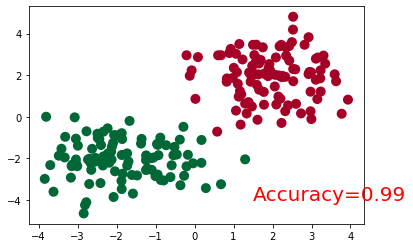

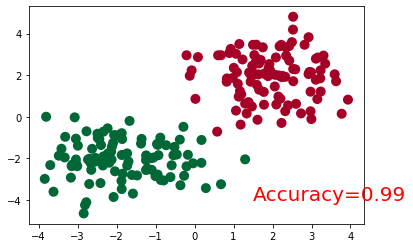

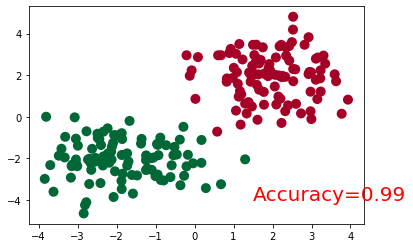

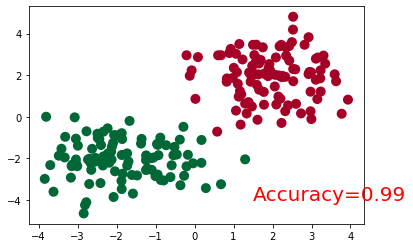

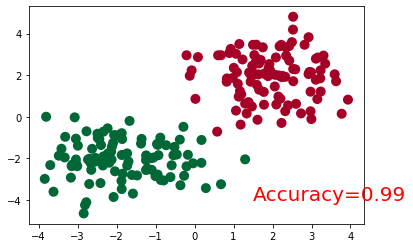

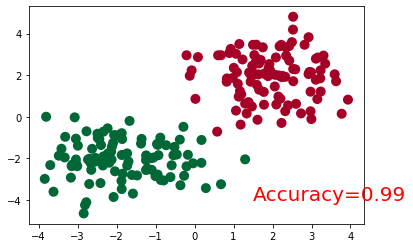

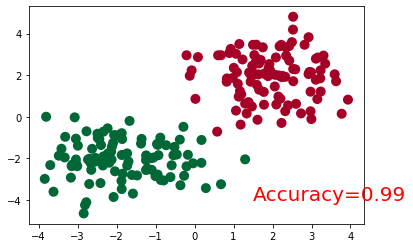

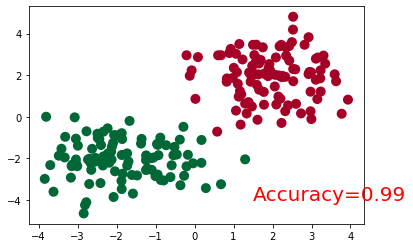

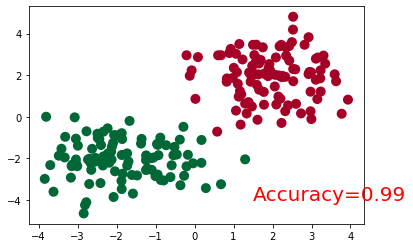

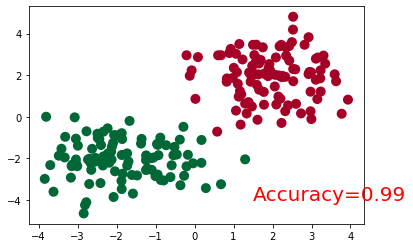

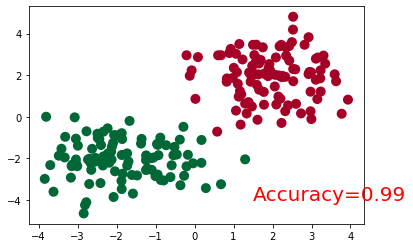

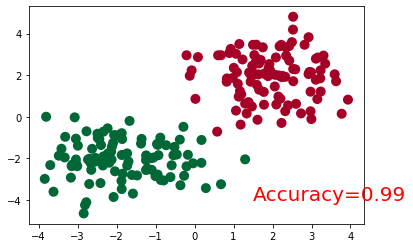

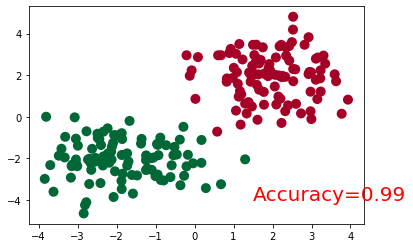

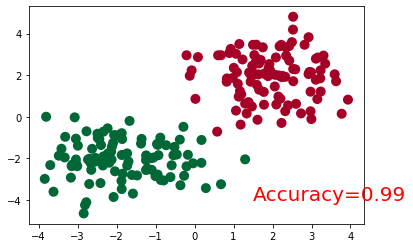

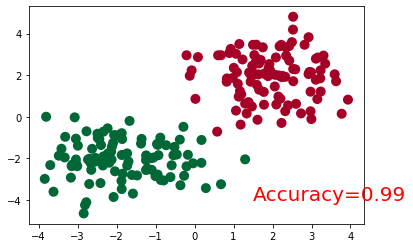

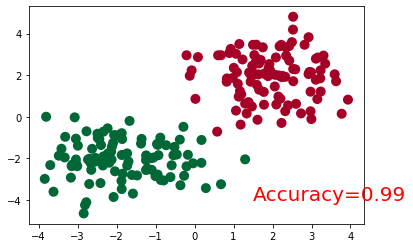

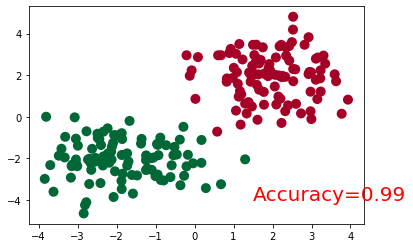

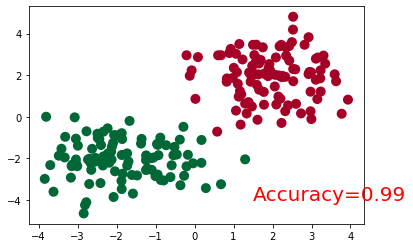

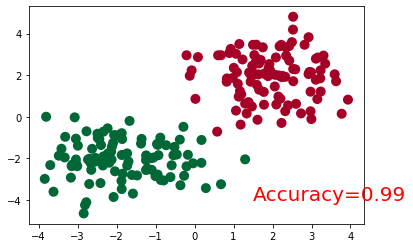

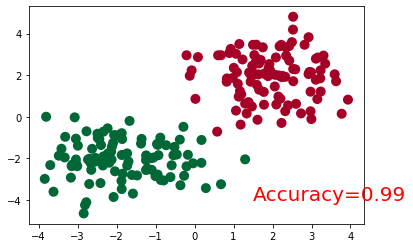

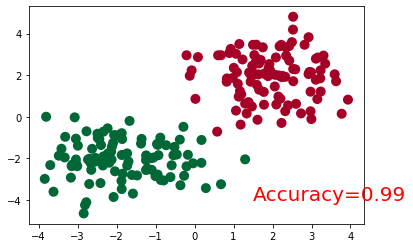

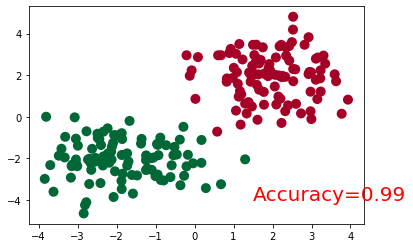

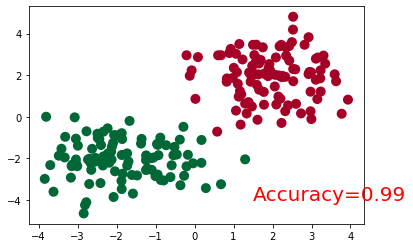

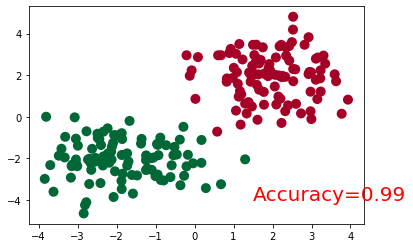

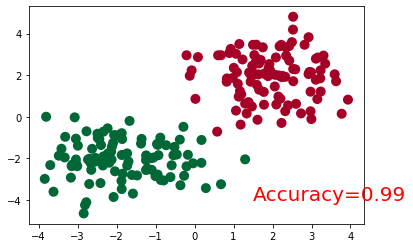

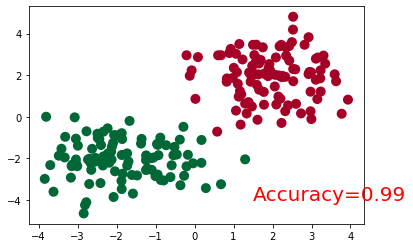

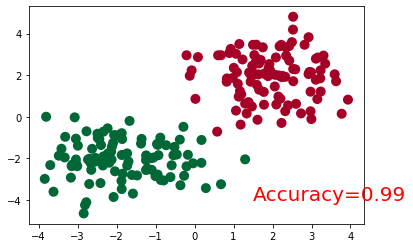

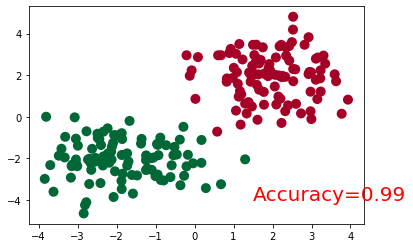

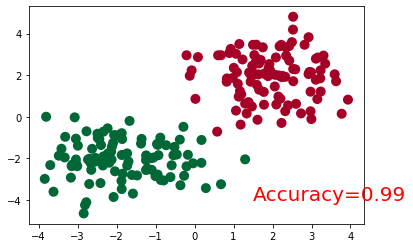

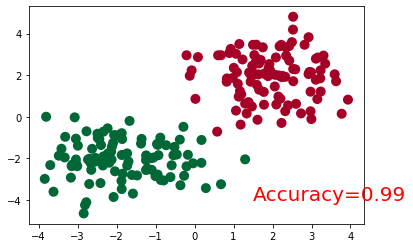

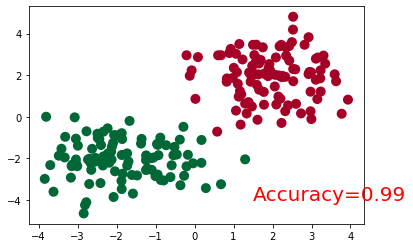

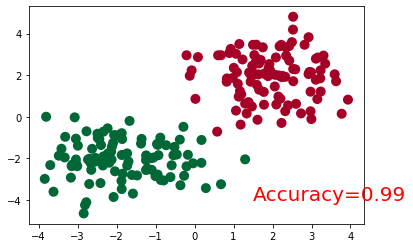

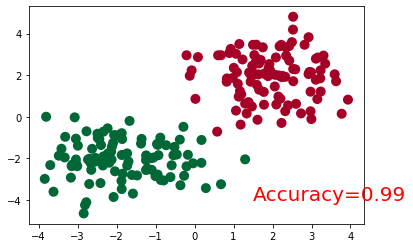

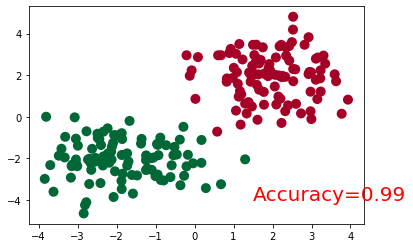

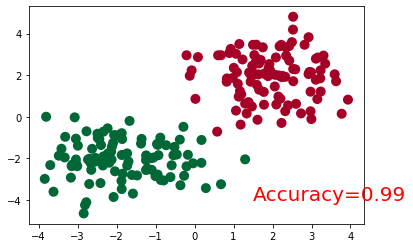

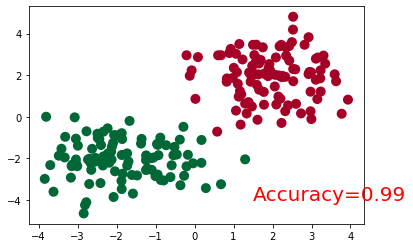

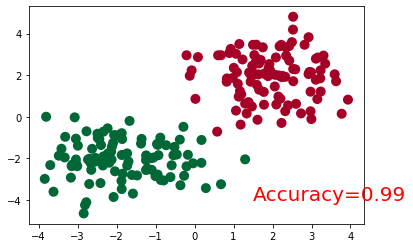

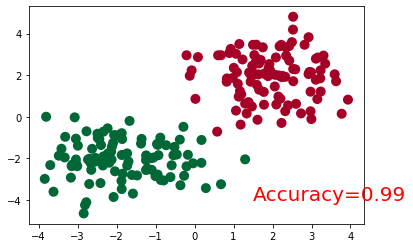

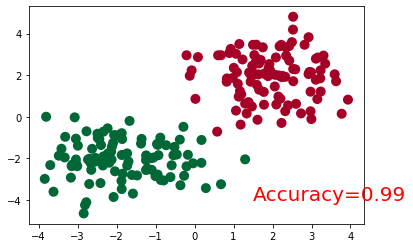

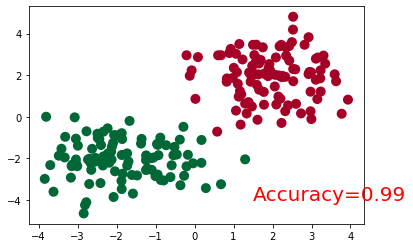

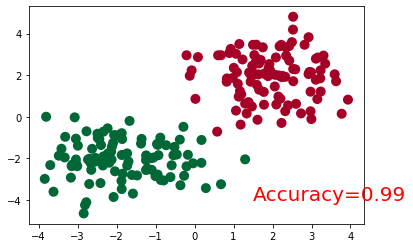

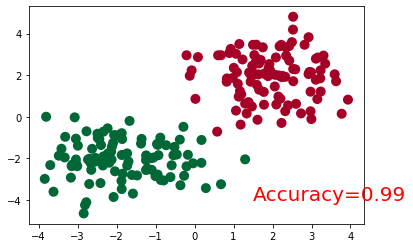

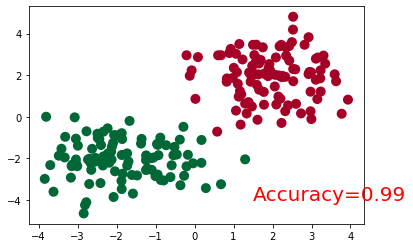

In [31]:
optimizer = T.optim.SGD(net.parameters(), lr=0.02)
loss_func = T.nn.CrossEntropyLoss()

for t in range(100):
    out = net(x)
    
    loss = loss_func(out, y)
    
    optimizer.zero_grad()   # 取梯度全部降为0 （因为每次训练完后，梯度会被保留在内存中）
    loss.backward()         # 计算梯度 反向传递过程
    optimizer.step()        # 优化，用 lr 来进行优化
    
    # 可视化表示内容
    if t % 2 == 0:
        # plot and show learning process
        plt.cla()
        prediction = T.max(F.softmax(out), 1)[1]  # 若此处[0]，则输出的是数值 
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y==target_y)/200
        plt.text(1.5, -4, 'Accuracy=%.2f'%accuracy, fontdict={'size':20, 'color':'red'})
        plt.pause(0.1)
        
plt.ioff()  # 停止画图
plt.show()

### 06.快速搭建法

In [2]:
# import package
import torch as T
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

# create fake data
n_data = T.ones(100, 2)
x0 = T.normal(2*n_data, 1)   # class0 x data (tensor) ,shape=(100, 2)
y0 = T.zeros(100)            # class0 y data (tensor) ,shape=(100, )
x1 = T.normal(-2*n_data, 1)  # class1 x data (tensor) ,shape=(100, 2)
y1 = T.ones(100)             # class0 y data (tensor) ,shape=(100, )
x = T.cat((x0,x1), 0).type(T.FloatTensor)  # FloatTensor = 32-bit floating
y = T.cat((y0,y1),).type(T.LongTensor)    # FongTensor = 64-bit integer

x,y = Variable(x),Variable(y)

# 查看生成的数据
# plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
# plt.show()


# mothod 1
class Net(T.nn.Module):
    def __init__(self, n_feature, n_hidden, n_ouput):
        super(Net, self).__init__()
        # 先定义层 ==> 再搭建层
        self.hidden = T.nn.Linear(n_feature, n_hidden)
        self.pridict = T.nn.Linear(n_hidden, n_ouput)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.pridict(x)  # 做预测后，不做截断（激活函数）
        return x

    
net1 = Net(2, 10, 2)

# mothod 2
net2 = T.nn.Sequential(
    T.nn.Linear(2, 10),
    T.nn.ReLU(),  # 此处 nn.xx 是一个类， 上面 function.xx 是一个方法
    T.nn.Linear(10, 2)
)
print(net1)
print(net2)
"""
Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)  # Net()中有self.hidden,所以以hidden命名layer
  (pridict): Linear(in_features=10, out_features=2, bias=True) # pridict layer
)
Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)

"""

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (pridict): Linear(in_features=10, out_features=2, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


### 07.网络的保存和提取

保存和提取主要是用于不同时间段的模型训练和预测等使用。A时间训练网络，但是没训练完，关机了，过了一段时间到B时间，提取参数继续训练，或者用于test。

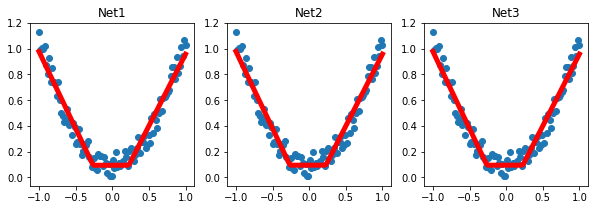

In [8]:
# create fake data
x = T.unsqueeze(T.linspace(-1, 1, 100), dim=1) # x data (tensor), shape = (100, 1)
y = x.pow(2) + 0.2 * T.rand(x.size())          # noise y data (tensor), shape = (100)

def save():
    # save net1
    net1 = T.nn.Sequential(
        T.nn.Linear(1, 10),
        T.nn.ReLU(),  # 此处 nn.xx 是一个类， 上面 function.xx 是一个方法
        T.nn.Linear(10, 1)
    )
    optimizer = T.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = T.nn.MSELoss()
    
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    T.save(net1, './log/net.pkl')  # entire net 整个网络
    T.save(net1.state_dict(), './log/net_params.pkl') # parameters 整个参数
    
    # plot result
    plt.figure(1, figsize=(10,3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
def restore_net():
    net2 = T.load('./log/net.pkl')
    
    prediction = net2(x)
    # plot result
    plt.figure(1, figsize=(10,3))
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

def restore_params():
    # 重构网络 --> 导入参数
    net3 = net1 = T.nn.Sequential(
        T.nn.Linear(1, 10),
        T.nn.ReLU(),  # 此处 nn.xx 是一个类， 上面 function.xx 是一个方法
        T.nn.Linear(10, 1)
    )
    net3.load_state_dict(T.load('./log/net_params.pkl'))
    
    prediction = net3(x)
    # plot result
    plt.figure(1, figsize=(10,3))
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

save()
restore_net()
restore_params()
plt.ioff()  # 停止画图
plt.show()

### 08.批数据训练

将数据按批次进行训练，可以加快训练速度。

In [19]:
import torch as T
import torch.utils.data as Data

BATCH_SIZE = 5

x = T.linspace(1, 10, 10)
y = T.linspace(10, 1, 10)

torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,# True
    num_workers=2,
)

for epoch in range(3):
    for step, (batch_x, batch_y) in enumerate(loader):
        # training...
        print('Epoch: ', epoch, ' | Step: ', step, ' | batch x: ',
             batch_x.numpy(), ' | batch y: ', batch_y.numpy())

Epoch:  0  | Step:  0  | batch x:  [1. 2. 3. 4. 5.]  | batch y:  [10.  9.  8.  7.  6.]
Epoch:  0  | Step:  1  | batch x:  [ 6.  7.  8.  9. 10.]  | batch y:  [5. 4. 3. 2. 1.]
Epoch:  1  | Step:  0  | batch x:  [1. 2. 3. 4. 5.]  | batch y:  [10.  9.  8.  7.  6.]
Epoch:  1  | Step:  1  | batch x:  [ 6.  7.  8.  9. 10.]  | batch y:  [5. 4. 3. 2. 1.]
Epoch:  2  | Step:  0  | batch x:  [1. 2. 3. 4. 5.]  | batch y:  [10.  9.  8.  7.  6.]
Epoch:  2  | Step:  1  | batch x:  [ 6.  7.  8.  9. 10.]  | batch y:  [5. 4. 3. 2. 1.]


### 09.优化器 Optimizer 

越复杂的NN，数据越多，训练越慢，那么就需要找一些别的方法来解决这个问题(喝醉了的人在回家的时候，摇摇晃晃走了很多弯路)。

传统的更新方法，在参数更新上做手脚。
$$W += -\text{Learning rate} * dx$$

Momentum（沿求导方向进行，梯度下降）（那么，我们把这个人从平地上放到了斜坡上，只要他往下走一点点，由于惯性，他就不自觉地沿下坡往下走，走的弯路就会变少）:
$$m = b1 * m - \text{Learning rate} * dx$$
$$W += m$$

AdaGrad(在学习率上做手脚，每一个参数的更新都有其不同的学习效率)（不是安排下坡，而是给他一双不好走路的鞋子，逼着他少走弯路）:
$$v += dx^2$$
$$W += - \text{Learning rate} * dx / \sqrt{v}$$

RMSProp（同时具备 Momentum 和 AdaGrad 的优势，不过并没有完全加上 Momentum 的$- \text{Learning rate} * dx$）（把下坡和不好走路的鞋子结合起来）:
$$\text{Momentum: }m = b1 * m - \text{Learning rate} * dx \text{, AdaGrad: }v += dx^2$$
$$W += \text{Learning rate} * dx / \sqrt{v}$$

Adam(进一步补充了 Momentum 和 AdaGrad 的优势):
$$\text{Momentum: }m = b1 * m + (1 - b1) * dx \text{, AdaGrad: }v = b2 * v + (1 - b2) dx^2 \\
W += -\text{Learning rate} * m / \sqrt{v} $$

计算 m 时有 Momentum 的“下坡”优势，计算 v 时有 AdaGrad 的“阻力”优势。在更新参数时，把 m 和 v 都考虑进去，实验证明，大多数时候，Adam 都能又快又好的达到目标，迅速收敛。

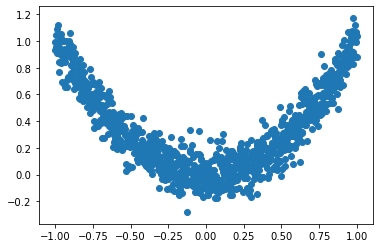

0


d:\ide\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:71: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


1
2
3
4
5
6
7
8
9
10
11


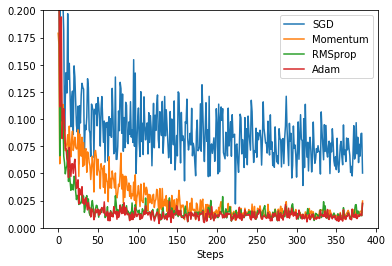

In [21]:
import torch as T
import torch.utils.data as Data
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt


# hyper parameters
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

# data layer
x = T.unsqueeze(T.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*T.normal(T.zeros(*x.size()))
# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

# default network
class Net(T.nn.Module):
    def __init__(self, n_feature, n_hidden, n_ouput):
        super(Net, self).__init__()
        # 先定义层 ==> 再搭建层
        self.hidden = T.nn.Linear(n_feature, n_hidden)
        self.pridict = T.nn.Linear(n_hidden, n_ouput)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.pridict(x)  # 做预测后，不做截断（激活函数）
        return x

# different nets
net_SGD = Net(1, 20, 1)
net_Momentum = Net(1,20,1)
net_RMSprop = Net(1,20,1)
net_Adam = Net(1,20,1)
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam] 

opt_SGD = T.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = T.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = T.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = T.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

# loss function
loss_func = T.nn.MSELoss()
losses_his = [[],[],[],[]]

# training
for epoch in range(EPOCH):
    print(epoch)
    for step, (batch_x,batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)
        
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)
            loss = loss_func(output, b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data[0])
    
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylim((0, 0.2))
plt.show()